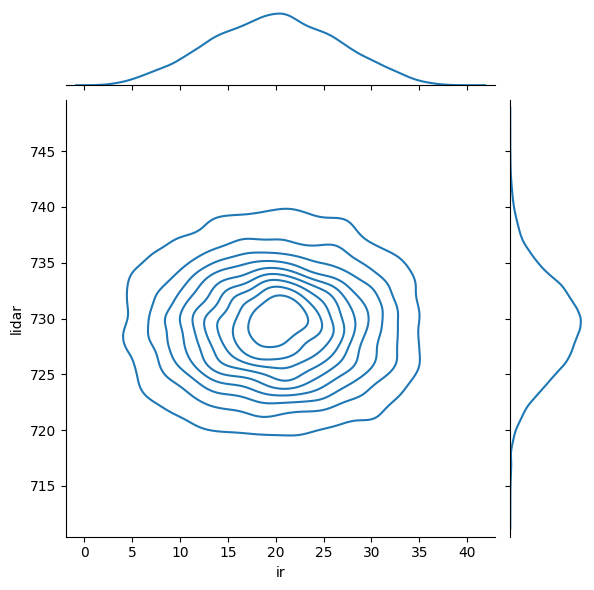

In [1]:
import pandas as pd    ###2dgauss###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_700.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

d = data[ (data["time"] < 160000) & (data["time"] >= 120000) ] #12時から16時までのデータだけ抽出
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d, x="ir", y="lidar", kind="kde") #旧バージョン: sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [2]:
print("光センサの計測値の分散:", d.ir.var()) ###coveach###
print("LiDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
    
a = diff_ir * diff_lidar
print("共分散:", sum(a)/(len(d)-1))

d.mean()

光センサの計測値の分散: 42.117126367701594
LiDARの計測値の分散: 17.702026469211457
共分散: -0.31677803385437114


ir        19.860247
lidar    729.311958
dtype: float64

In [3]:
d.cov() ###covonce###

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [4]:
from scipy.stats import multivariate_normal   ###multivariatenormal###

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

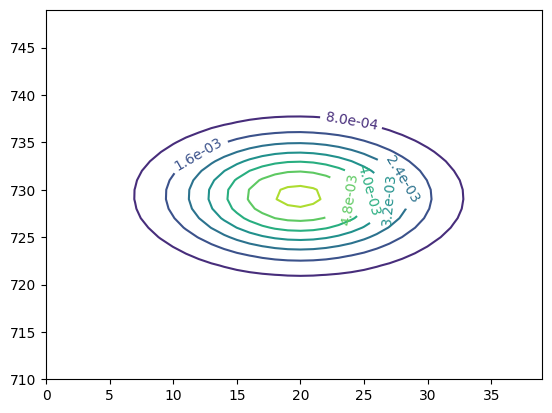

In [5]:
import numpy as np                ###contour###
 
x, y = np.mgrid[0:40, 710:750]     #2次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape + (2,))     #xは40x40の2次元リストで、これに3次元目を加えて40x40x2のリストを作成
pos[:, :, 0] = x                                   #加えた3次元目にx,yを代入
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos)) #x, y座標と、それに対応する密度を算出
cont.clabel(fmt='%1.1e')                         #等高線に値を書き込むためのフォーマット指定

plt.show()   #描画

In [6]:
print("X座標:", x)   ###grid###
print("Y座標:", y)

X座標: [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標: [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


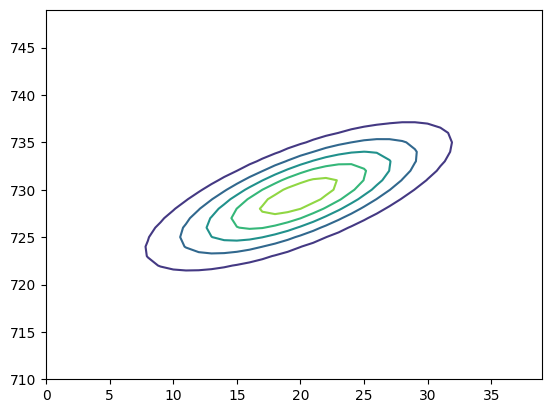

In [7]:
c = d.cov().values + np.array([[0, 20], [20,0]])    ###covadd###
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos)) 
plt.show() 